# Applied Deep Learning - a use case based approach to understand deep neural networks

### Umberto Michelucci

Buy the book: https://www.apress.com/us/book/9781484237892

(C) Umberto Michelucci 2018-2019 - umberto.michelucci@gmail.com 

github repository: https://github.com/michelucci/applieddeeplearningbook

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from random import *

In [2]:
def get_label_name(idx):
    if (idx == 0):
        return '(0) T-shirt/top'
    elif (idx == 1):
        return '(1) Trouser'
    elif (idx == 2):
        return '(2) Pullover'
    elif (idx == 3):
        return '(3) Dress'
    elif (idx == 4):
        return '(4) Coat'
    elif (idx == 5):
        return '(5) Sandal'
    elif (idx == 6):
        return '(6) Shirt'
    elif (idx == 7):
        return '(7) Sneaker'
    elif (idx == 8):
        return '(8) Bag'
    elif (idx == 9):
        return '(9) Ankle boot'

In [3]:
data_train = pd.read_csv('fashion-mnist_train.csv', header = 0)
data_test = pd.read_csv('fashion-mnist_test.csv', header = 0)

In [4]:
len(data_train)

60000

In [5]:
data_train.shape

(60000, 785)

In [6]:
labels = data_train['label'].values.reshape(1, 60000)

labels_ = np.zeros((60000, 10))
labels_[np.arange(60000), labels] = 1
labels_ = labels_.transpose()


train = data_train.drop('label', axis=1).transpose()

In [7]:
print(labels_.shape)
print(train.shape)

(10, 60000)
(784, 60000)


In [8]:
labels_test = data_test['label'].values.reshape(1, 10000)

labels_test_ = np.zeros((10000, 10))
labels_test_[np.arange(10000), labels_test] = 1
labels_test_ = labels_test_.transpose()


test = data_test.drop('label', axis=1).transpose()

In [9]:
labels_test_.shape

(10, 10000)

In [10]:
train = np.array(train / 255.0)
test = np.array(test / 255.0)
labels_ = np.array(labels_)
labels_test_ = np.array(labels_test_)

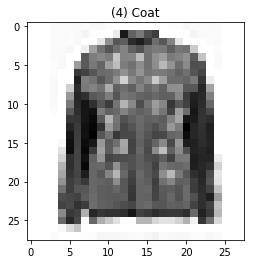

In [11]:
idx = 5
plt.imshow(train[:,idx].reshape(28,28), cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("on")
plt.title(get_label_name(labels[:,idx]))
plt.show()

# 1 layer with softmax

In [42]:
def build_model_layers(number_neurons):
    n_dim = 784
    tf.reset_default_graph()

    
    
    # Number of neurons in the layers
    n1 = number_neurons # Number of neurons in layer 1
    n2 = number_neurons # Number of neurons in layer 2 
    n3 = number_neurons
    n4 = 10
    #n5 = 10 # Neurons for the softmax function

    cost_history = np.empty(shape=[0], dtype = float)
    learning_rate = tf.placeholder(tf.float32, shape=())

    stddev_f = 0.1

    tf.set_random_seed(5)

    X = tf.placeholder(tf.float32, [n_dim, None])
    Y = tf.placeholder(tf.float32, [10, None])
    W1 = tf.Variable(tf.random_normal([n1, n_dim], stddev=stddev_f)) 
    b1 = tf.Variable(tf.constant(0.0, shape = [n1,1]) )
    W2 = tf.Variable(tf.random_normal([n2, n1], stddev=stddev_f)) 
    b2 = tf.Variable(tf.constant(0.0, shape = [n2,1])) 
    W3 = tf.Variable(tf.random_normal([n3,n2], stddev = stddev_f))
    b3 = tf.Variable(tf.constant(0.0, shape = [n3,1]))
    W4 = tf.Variable(tf.random_normal([n4,n3], stddev = stddev_f))
    b4 = tf.Variable(tf.constant(0.0, shape = [n4,1]))
    #W5 = tf.Variable(tf.truncated_normal([n5,n4], stddev = stddev_f))
    #b5 = tf.Variable(tf.constant(stddev_f, shape = [n5,1]))

    # Let's build our network...
    Z1 = tf.nn.relu(tf.matmul(W1, X) + b1) # n1 x n_dim * n_dim x n_obs = n1 x n_obs
    Z2 = tf.nn.relu(tf.matmul(W2, Z1) + b2) # n2 x n1 * n1 * n_obs = n2 x n_obs
    Z3 = tf.nn.relu(tf.matmul(W3, Z2) + b3)
    Z4 = tf.matmul(W4, Z3) + b4
    #Z4 = tf.nn.relu(tf.matmul(W4, Z3) + b4)
    #Z5 = tf.matmul(W5,Z4) + b5
    y_ = tf.nn.softmax(Z4,0) # n2 x n_obs (10 x None)


    cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    init = tf.global_variables_initializer()
    
    return optimizer, cost, y_, X, Y, learning_rate

In [27]:
def build_model(number_neurons):
    n_dim = 784
    tf.reset_default_graph()

    # Number of neurons in the layers
    n1 = number_neurons# Number of neurons in layer 1
    n2 = 10 # Number of neurons in output layer 

    cost_history = np.empty(shape=[1], dtype = float)
    learning_rate = tf.placeholder(tf.float32, shape=())

    X = tf.placeholder(tf.float32, [n_dim, None])
    Y = tf.placeholder(tf.float32, [10, None])
    W1 = tf.Variable(tf.truncated_normal([n1, n_dim], stddev=.1)) 
    b1 = tf.Variable(tf.constant(0.1, shape = [n1,1]) )
    W2 = tf.Variable(tf.truncated_normal([n2, n1], stddev=.1)) 
    b2 = tf.Variable(tf.constant(0.1, shape = [n2,1])) 

    # Let's build our network...
    Z1 = tf.nn.relu(tf.matmul(W1, X) + b1) # n1 x n_dim * n_dim x n_obs = n1 x n_obs
    Z2 = tf.matmul(W2, Z1) + b2 # n2 x n1 * n1 * n_obs = n2 x n_obs
    y_ = tf.nn.softmax(Z2,0) # n2 x n_obs (10 x None)

    cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    init = tf.global_variables_initializer()
    
    return optimizer, cost, y_, X, Y, learning_rate

In [47]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step = 100, 
                 learning_r = 0.001, number_neurons = 15, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [29]:
def model(minibatch_size, training_epochs, features, classes, logging_step = 100, learning_r = 0.001, number_neurons = 15):
    
    opt, c, y_, X, Y, learning_rate = build_model(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if (epoch % logging_step == 0):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_, learning_rate: learning_r}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_, learning_rate: learning_r}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [30]:
%%time_it
acc_train, acc_test, sess, cost_history = model(minibatch_size = 50, 
                              training_epochs = 100, 
                              features = train, 
                              classes = labels_, 
                              logging_step = 10,
                              learning_r = 0.001,
                              number_neurons = 15)

print(acc_train)
print(acc_test)

Reached epoch 0 cost J = 0.327792
Reached epoch 10 cost J = 0.283489
Reached epoch 20 cost J = 0.223011
Reached epoch 30 cost J = 0.185602
Reached epoch 40 cost J = 0.163496
Reached epoch 50 cost J = 0.149302
Reached epoch 60 cost J = 0.139664
Reached epoch 70 cost J = 0.132576
Reached epoch 80 cost J = 0.126942
Reached epoch 90 cost J = 0.122225
Reached epoch 100 cost J = 0.118169
0.75755
0.754


In [34]:
nn = [1,5,10,15,25,30, 50, 150]
for nn_ in nn:
    acc_train, acc_test, sess, cost_history = model(minibatch_size = 50, 
                              training_epochs = 50, 
                              features = train, 
                              classes = labels_, 
                              logging_step = 50,
                              learning_r = 0.001,
                              number_neurons = nn_)
    print('Number:',nn_,'Acc. Train:', acc_train, 'Acc. Test', acc_test)

Reached epoch 0 cost J = 0.325249
Reached epoch 50 cost J = 0.292769
Number: 1 Acc. Train: 0.201383 Acc. Test 0.2042
Reached epoch 0 cost J = 0.323873
Reached epoch 50 cost J = 0.165635
Number: 5 Acc. Train: 0.639417 Acc. Test 0.6377
Reached epoch 0 cost J = 0.325217
Reached epoch 50 cost J = 0.162485
Number: 10 Acc. Train: 0.639183 Acc. Test 0.6348
Reached epoch 0 cost J = 0.326944
Reached epoch 50 cost J = 0.145429
Number: 15 Acc. Train: 0.687183 Acc. Test 0.6815
Reached epoch 0 cost J = 0.322997
Reached epoch 50 cost J = 0.141857
Number: 25 Acc. Train: 0.690917 Acc. Test 0.6917
Reached epoch 0 cost J = 0.323642
Reached epoch 50 cost J = 0.139777
Number: 30 Acc. Train: 0.6965 Acc. Test 0.6887
Reached epoch 0 cost J = 0.314705
Reached epoch 50 cost J = 0.126111
Number: 50 Acc. Train: 0.73665 Acc. Test 0.7369


In [35]:
nn = [150]
for nn_ in nn:
    acc_train, acc_test, sess, cost_history = model(minibatch_size = 50, 
                              training_epochs = 50, 
                              features = train, 
                              classes = labels_, 
                              logging_step = 50,
                              learning_r = 0.001,
                              number_neurons = nn_)
    print('Number:',nn_,'Acc. Train:', acc_train, 'Acc. Test', acc_test)

Reached epoch 0 cost J = 0.305623
Reached epoch 50 cost J = 0.109506
Number: 150 Acc. Train: 0.78545 Acc. Test 0.7848


In [37]:
nn = [300]
for nn_ in nn:
    acc_train, acc_test, sess, cost_history = model(minibatch_size = 50, 
                              training_epochs = 50, 
                              features = train, 
                              classes = labels_, 
                              logging_step = 50,
                              learning_r = 0.001,
                              number_neurons = nn_)
    print('Number:',nn_,'Acc. Train:', acc_train, 'Acc. Test', acc_test)

Reached epoch 0 cost J = 0.274023
Reached epoch 50 cost J = 0.0997691
Number: 300 Acc. Train: 0.806267 Acc. Test 0.8067


In [38]:
nn = [1000]
for nn_ in nn:
    acc_train, acc_test, sess, cost_history = model(minibatch_size = 50, 
                              training_epochs = 50, 
                              features = train, 
                              classes = labels_, 
                              logging_step = 50,
                              learning_r = 0.001,
                              number_neurons = nn_)
    print('Number:',nn_,'Acc. Train:', acc_train, 'Acc. Test', acc_test)

Reached epoch 0 cost J = 0.234059
Reached epoch 50 cost J = 0.0857759
Number: 1000 Acc. Train: 0.828117 Acc. Test 0.8316


In [148]:
%%time
nn = [3000]
for nn_ in nn:
    acc_train, acc_test, sess, cost_history = model(minibatch_size = 50, 
                              training_epochs = 50, 
                              features = train, 
                              classes = labels_, 
                              logging_step = 50,
                              learning_r = 0.001,
                              number_neurons = nn_)
    print('Number:',nn_,'Acc. Train:', acc_train, 'Acc. Test', acc_test)

Reached epoch 0 cost J = 0.195685
Reached epoch 50 cost J = 0.0766994
Number: 3000 Acc. Train: 0.8469 Acc. Test 0.8478
Wall time: 35min 27s


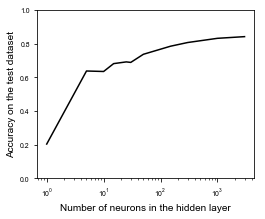

In [145]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(3.9, 3.1))
ax = fig.add_subplot(1, 1, 1)


ax.set_xlabel('Number of neurons in the hidden layer')
ax.set_ylabel('Accuracy on the test dataset')
plt.plot([1,5,10,15,25,30, 50, 150, 300, 1000, 3000], 
         [0.2042, 0.6377, 0.6348, 0.6815, 0.6917, 0.6887, 0.7369, 0.7848, 0.8067, 0.8316, 0.8416],
        color = 'black')

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0,1)
#plt.figure(figsize=(8,6))
#plt.title("Cost Function vs. epoch number")
#plt.xlabel("epochs")
#plt.xlim((0,80))
#plt.ylim((0,0.33))
#plt.ylabel("Cost function $J$")
#plt.plot(range(len(cost_history)), cost_history)

plt.xscale('log')
fig.savefig('Figure_7-26'+'.png', format='png', dpi=300,bbox_inches='tight')


In [44]:
nn = [1,5,10,15,25,30, 50]
for nn_ in nn:
    acc_train, acc_test, sess, cost_history = model_layers(minibatch_size = 50, 
                              training_epochs = 50, 
                              features = train, 
                              classes = labels_, 
                              logging_step = 50,
                              learning_r = 0.001,
                              number_neurons = nn_)
    print('Number:',nn_,'Acc. Train:', acc_train, 'Acc. Test', acc_test)

Reached epoch 0 cost J = 0.325125
Reached epoch 50 cost J = 0.325125
Number: 1 Acc. Train: 0.1 Acc. Test 0.1
Reached epoch 0 cost J = 0.325155
Reached epoch 50 cost J = 0.324985
Number: 5 Acc. Train: 0.187 Acc. Test 0.19
Reached epoch 0 cost J = 0.325125
Reached epoch 50 cost J = 0.324584
Number: 10 Acc. Train: 0.235317 Acc. Test 0.2403
Reached epoch 0 cost J = 0.325325
Reached epoch 50 cost J = 0.323418
Number: 15 Acc. Train: 0.218983 Acc. Test 0.2157
Reached epoch 0 cost J = 0.324865
Reached epoch 50 cost J = 0.256246
Number: 25 Acc. Train: 0.499867 Acc. Test 0.4958
Reached epoch 0 cost J = 0.324831
Reached epoch 50 cost J = 0.25852
Number: 30 Acc. Train: 0.422367 Acc. Test 0.4173
Reached epoch 0 cost J = 0.325196
Reached epoch 50 cost J = 0.141386
Number: 50 Acc. Train: 0.676683 Acc. Test 0.6797


In [83]:
neurons_ = np.random.randint(low=35, high=60.0, size=(10))

#r = - np.arange(0,1,0.05)*4.0
r = -np.random.random([10])*4.0

learning_ = 10**r

In [85]:
for i in range(len(neurons_)):
    #print('Number:',neurons_[i],'learning', learning_[i])
    acc_train, acc_test, sess, cost_history = model_layers(minibatch_size = 50, 
                              training_epochs = 50, 
                              features = train, 
                              classes = labels_, 
                              logging_step = 50,
                              learning_r = learning_[i],
                              number_neurons = neurons_[i], debug = False)
    print('Number:',neurons_[i],'learning', learning_[i], 'Acc. Train:', acc_train, 'Acc. Test', acc_test)

Number: 52 learning 0.00121597393409 Acc. Train: 0.705 Acc. Test 0.7004
Number: 39 learning 0.437125703907 Acc. Train: 0.1 Acc. Test 0.1
Number: 49 learning 0.0591695853312 Acc. Train: 0.1 Acc. Test 0.1
Number: 47 learning 0.00498280238205 Acc. Train: 0.825017 Acc. Test 0.8243
Number: 53 learning 0.0104536544878 Acc. Train: 0.1 Acc. Test 0.1
Number: 56 learning 0.0550769654956 Acc. Train: 0.1 Acc. Test 0.1
Number: 52 learning 0.000357130373762 Acc. Train: 0.3123 Acc. Test 0.3088
Number: 50 learning 0.138565210139 Acc. Train: 0.1 Acc. Test 0.1
Number: 48 learning 0.139522070043 Acc. Train: 0.1 Acc. Test 0.1
Number: 50 learning 0.214833496372 Acc. Train: 0.1 Acc. Test 0.1


In [99]:
neurons_ = np.random.randint(low=35, high=60.0, size=(5))

#r = - np.arange(0,1,0.05)*4.0
learning_ = np.random.random([5])*(0.01-0.001)+0.001

In [100]:
learning_

array([ 0.00609832,  0.00820416,  0.00692562,  0.00990794,  0.00249272])

In [101]:
for i in range(len(neurons_)):
    #print('Number:',neurons_[i],'learning', learning_[i])
    acc_train, acc_test, sess, cost_history = model_layers(minibatch_size = 50, 
                              training_epochs = 50, 
                              features = train, 
                              classes = labels_, 
                              logging_step = 50,
                              learning_r = learning_[i],
                              number_neurons = neurons_[i], debug = False)
    print('Number:',neurons_[i],'learning', learning_[i], 'Acc. Train:', acc_train, 'Acc. Test', acc_test)

Number: 51 learning 0.00609831821206 Acc. Train: 0.835267 Acc. Test 0.8334
Number: 51 learning 0.00820416458624 Acc. Train: 0.846017 Acc. Test 0.8417
Number: 44 learning 0.00692561907161 Acc. Train: 0.83995 Acc. Test 0.8404
Number: 43 learning 0.00990793571566 Acc. Train: 0.84755 Acc. Test 0.847
Number: 58 learning 0.00249271519461 Acc. Train: 0.791 Acc. Test 0.7879


## Test with mini-batch size

In [112]:
neurons_ = np.random.randint(low=35, high=60.0, size=(5))

#r = - np.arange(0,1,0.05)*4.0
learning_ = np.random.random([5])*(0.01-0.001)+0.001

mb_size_ = np.random.randint(low=20, high=80, size = 5)

In [113]:
mb_size_

array([66, 40, 70, 71, 51])

In [114]:
for i in range(len(neurons_)):
    #print('Number:',neurons_[i],'learning', learning_[i])
    acc_train, acc_test, sess, cost_history = model_layers(minibatch_size = mb_size_[i], 
                              training_epochs = 50, 
                              features = train, 
                              classes = labels_, 
                              logging_step = 50,
                              learning_r = learning_[i],
                              number_neurons = neurons_[i], debug = False)
    print('Number:',neurons_[i],'learning', learning_[i], 'mb size',mb_size_[i],
          'Acc. Train:', acc_train, 'Acc. Test', acc_test)

Number: 36 learning 0.00774286333878 mb size 66 Acc. Train: 0.818267 Acc. Test 0.8151
Number: 41 learning 0.0068067093709 mb size 40 Acc. Train: 0.83795 Acc. Test 0.8372
Number: 51 learning 0.00756241635423 mb size 70 Acc. Train: 0.82745 Acc. Test 0.8277
Number: 57 learning 0.00727651917086 mb size 71 Acc. Train: 0.8307 Acc. Test 0.8278
Number: 48 learning 0.0010709564944 mb size 51 Acc. Train: 0.659183 Acc. Test 0.6604


## Test with mini-batch size complete

In [115]:
neurons_ = np.random.randint(low=35, high=60.0, size=(10))

#r = - np.arange(0,1,0.05)*4.0
r = -np.random.random([10])*3.0-1

learning_ = 10**r

mb_size_ = np.random.randint(low=20, high=80, size = 10)

In [116]:
learning_

array([ 0.00012797,  0.01948796,  0.00013022,  0.00028204,  0.00414294,
        0.0419834 ,  0.01212683,  0.06793482,  0.09984361,  0.0845947 ])

In [117]:
for i in range(len(neurons_)):
    #print('Number:',neurons_[i],'learning', learning_[i])
    acc_train, acc_test, sess, cost_history = model_layers(minibatch_size = mb_size_[i], 
                              training_epochs = 50, 
                              features = train, 
                              classes = labels_, 
                              logging_step = 50,
                              learning_r = learning_[i],
                              number_neurons = neurons_[i], debug = False)
    print('Number:',neurons_[i],'learning', learning_[i], 'mb size',mb_size_[i],
          'Acc. Train:', acc_train, 'Acc. Test', acc_test)

Number: 59 learning 0.000127972130513 mb size 57 Acc. Train: 0.142983 Acc. Test 0.1432
Number: 41 learning 0.0194879551184 mb size 69 Acc. Train: 0.853167 Acc. Test 0.8535
Number: 58 learning 0.000130223106061 mb size 65 Acc. Train: 0.16095 Acc. Test 0.1574
Number: 58 learning 0.000282041605562 mb size 37 Acc. Train: 0.4727 Acc. Test 0.4735
Number: 35 learning 0.00414294465431 mb size 27 Acc. Train: 0.83305 Acc. Test 0.8296
Number: 43 learning 0.0419833979363 mb size 24 Acc. Train: 0.1 Acc. Test 0.1
Number: 49 learning 0.0121268293662 mb size 46 Acc. Train: 0.858733 Acc. Test 0.8561
Number: 36 learning 0.0679348165416 mb size 60 Acc. Train: 0.1 Acc. Test 0.1
Number: 53 learning 0.0998436068389 mb size 63 Acc. Train: 0.1 Acc. Test 0.1
Number: 58 learning 0.0845946984423 mb size 63 Acc. Train: 0.1 Acc. Test 0.1


In [149]:
neurons_ = np.random.randint(low=35, high=60.0, size=(10))
r = -np.random.random([10])*3.0-1
learning_ = 10**r
mb_size_ = np.random.randint(low=20, high=80, size = 10)
epochs_ = np.random.randint(low = 40, high = 100, size = (10))

In [122]:
for i in range(len(neurons_)):
    #print('Number:',neurons_[i],'learning', learning_[i])
    acc_train, acc_test, sess, cost_history = model_layers(minibatch_size = mb_size_[i], 
                              training_epochs = epochs_[i], 
                              features = train, 
                              classes = labels_, 
                              logging_step = 50,
                              learning_r = learning_[i],
                              number_neurons = neurons_[i], debug = False)
    print('epochs:', epochs_[i], 'Number:',neurons_[i],'learning', learning_[i], 'mb size',mb_size_[i],
          'Acc. Train:', acc_train, 'Acc. Test', acc_test

epochs: 95 Number: 41 learning 0.00626467070005 mb size 48 Acc. Train: 0.850817 Acc. Test 0.8506
epochs: 48 Number: 46 learning 0.00246417801667 mb size 43 Acc. Train: 0.798333 Acc. Test 0.8002
epochs: 41 Number: 41 learning 0.0286441262134 mb size 61 Acc. Train: 0.862917 Acc. Test 0.8604
epochs: 41 Number: 58 learning 0.000625828992856 mb size 65 Acc. Train: 0.477483 Acc. Test 0.4787
epochs: 73 Number: 48 learning 0.0230103999933 mb size 50 Acc. Train: 0.1 Acc. Test 0.1
epochs: 69 Number: 43 learning 0.0942246773651 mb size 74 Acc. Train: 0.1 Acc. Test 0.1
epochs: 88 Number: 50 learning 0.0618388683733 mb size 75 Acc. Train: 0.1 Acc. Test 0.1
epochs: 73 Number: 48 learning 0.000574365251649 mb size 70 Acc. Train: 0.546767 Acc. Test 0.5463
epochs: 62 Number: 59 learning 0.000157271812968 mb size 24 Acc. Train: 0.48665 Acc. Test 0.4855
epochs: 58 Number: 44 learning 0.0195280568964 mb size 61 Acc. Train: 0.1 Acc. Test 0.1


In [151]:
%%time
acc_train, acc_test, sess, cost_history = model_layers(minibatch_size = mb_size_[2], 
                              training_epochs = epochs_[2], 
                              features = train, 
                              classes = labels_, 
                              logging_step = 50,
                              learning_r = learning_[2],
                              number_neurons = neurons_[2], debug = False)

Wall time: 2min 38s


# With Adam

In [123]:
def build_model_layers(number_neurons):
    n_dim = 784
    tf.reset_default_graph()

    
    
    # Number of neurons in the layers
    n1 = number_neurons # Number of neurons in layer 1
    n2 = number_neurons # Number of neurons in layer 2 
    n3 = number_neurons
    n4 = 10
    #n5 = 10 # Neurons for the softmax function

    cost_history = np.empty(shape=[0], dtype = float)
    learning_rate = tf.placeholder(tf.float32, shape=())

    stddev_f = 0.1

    tf.set_random_seed(5)

    X = tf.placeholder(tf.float32, [n_dim, None])
    Y = tf.placeholder(tf.float32, [10, None])
    W1 = tf.Variable(tf.random_normal([n1, n_dim], stddev=stddev_f)) 
    b1 = tf.Variable(tf.constant(0.0, shape = [n1,1]) )
    W2 = tf.Variable(tf.random_normal([n2, n1], stddev=stddev_f)) 
    b2 = tf.Variable(tf.constant(0.0, shape = [n2,1])) 
    W3 = tf.Variable(tf.random_normal([n3,n2], stddev = stddev_f))
    b3 = tf.Variable(tf.constant(0.0, shape = [n3,1]))
    W4 = tf.Variable(tf.random_normal([n4,n3], stddev = stddev_f))
    b4 = tf.Variable(tf.constant(0.0, shape = [n4,1]))
    #W5 = tf.Variable(tf.truncated_normal([n5,n4], stddev = stddev_f))
    #b5 = tf.Variable(tf.constant(stddev_f, shape = [n5,1]))

    # Let's build our network...
    Z1 = tf.nn.relu(tf.matmul(W1, X) + b1) # n1 x n_dim * n_dim x n_obs = n1 x n_obs
    Z2 = tf.nn.relu(tf.matmul(W2, Z1) + b2) # n2 x n1 * n1 * n_obs = n2 x n_obs
    Z3 = tf.nn.relu(tf.matmul(W3, Z2) + b3)
    Z4 = tf.matmul(W4, Z3) + b4
    #Z4 = tf.nn.relu(tf.matmul(W4, Z3) + b4)
    #Z5 = tf.matmul(W5,Z4) + b5
    y_ = tf.nn.softmax(Z4,0) # n2 x n_obs (10 x None)


    cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
    optimizer = optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, 
                                                   beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8).minimize(cost)

    init = tf.global_variables_initializer()
    
    return optimizer, cost, y_, X, Y, learning_rate

In [124]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step = 100, 
                 learning_r = 0.001, number_neurons = 15, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [128]:
acc_train, acc_test, sess, cost_history = model_layers(minibatch_size = 41, 
                              training_epochs = 41, 
                              features = train, 
                              classes = labels_, 
                              logging_step = 10,
                              learning_r = 1e-5,
                              number_neurons = 58, debug = True)
print(acc_train)
print(acc_test)

Reached epoch 0 cost J = 0.26278
Reached epoch 10 cost J = 0.0999409
Reached epoch 20 cost J = 0.0861616
Reached epoch 30 cost J = 0.0797902
Reached epoch 40 cost J = 0.0756751
0.84855
0.847


In [140]:
acc_train, acc_test, sess, cost_history = model_layers(minibatch_size = 41, 
                              training_epochs = 100, 
                              features = train, 
                              classes = labels_, 
                              logging_step = 10,
                              learning_r = 1e-6,
                              number_neurons = 100, debug = True)
print(acc_train)
print(acc_test)

Reached epoch 0 cost J = 0.31244
Reached epoch 10 cost J = 0.188521
Reached epoch 20 cost J = 0.135262
Reached epoch 30 cost J = 0.117864
Reached epoch 40 cost J = 0.108305
Reached epoch 50 cost J = 0.101986
Reached epoch 60 cost J = 0.0974232
Reached epoch 70 cost J = 0.0939087
Reached epoch 80 cost J = 0.091067
Reached epoch 90 cost J = 0.0886948
Reached epoch 100 cost J = 0.0866975
0.824533
0.8244


In [135]:
neurons_ = np.random.randint(low=35, high=60.0, size=(20))

#r = - np.arange(0,1,0.05)*4.0
r = -np.random.random([20])*(6-5)-5

learning_ = 10**r

mb_size_ = np.random.randint(low=20, high=80, size = 20)

epochs_ = np.random.randint(low = 40, high = 100, size = (20))

In [136]:
for i in range(len(neurons_)):
    #print('Number:',neurons_[i],'learning', learning_[i])
    acc_train, acc_test, sess, cost_history = model_layers(minibatch_size = mb_size_[i], 
                              training_epochs = epochs_[i], 
                              features = train, 
                              classes = labels_, 
                              logging_step = 10,
                              learning_r = learning_[i],
                              number_neurons = neurons_[i], debug = False)
    print('epochs:', epochs_[i], 'Number:',neurons_[i],'learning', learning_[i], 'mb size',mb_size_[i],
          'Acc. Train:', acc_train, 'Acc. Test', acc_test)

epochs: 65 Number: 46 learning 3.75743361986e-06 mb size 20 Acc. Train: 0.838683 Acc. Test 0.8407
epochs: 54 Number: 37 learning 7.12390609733e-06 mb size 56 Acc. Train: 0.8246 Acc. Test 0.8241
epochs: 42 Number: 37 learning 2.14766290607e-06 mb size 45 Acc. Train: 0.712933 Acc. Test 0.7131
epochs: 70 Number: 39 learning 5.59340704666e-06 mb size 76 Acc. Train: 0.814483 Acc. Test 0.8107
epochs: 83 Number: 50 learning 8.14470677233e-06 mb size 32 Acc. Train: 0.1 Acc. Test 0.1
epochs: 60 Number: 44 learning 3.97668096387e-06 mb size 58 Acc. Train: 0.8123 Acc. Test 0.815
epochs: 52 Number: 35 learning 2.11130468914e-06 mb size 78 Acc. Train: 0.691283 Acc. Test 0.6906
epochs: 70 Number: 43 learning 4.94147290757e-06 mb size 32 Acc. Train: 0.837283 Acc. Test 0.8374
epochs: 70 Number: 44 learning 8.09986058619e-06 mb size 59 Acc. Train: 0.847767 Acc. Test 0.8477
epochs: 46 Number: 35 learning 3.28760183015e-06 mb size 37 Acc. Train: 0.779567 Acc. Test 0.777
epochs: 51 Number: 46 learning 3.1